In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.metrics import mean_squared_error as MSE
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("/content/Database Tether 3.csv")
print(data.head())

   Ultimo_1  Abertura_1  Ultimo_2  Esperado
0    1.0029      1.0032    1.0021    1.0014
1    1.0014      1.0029    1.0029    1.0022
2    1.0022      1.0014    1.0014    1.0026
3    1.0026      1.0022    1.0022    1.0045
4    1.0045      1.0026    1.0026    1.0039


            Ultimo_1  Abertura_1  Ultimo_2  Esperado
Ultimo_1    1.000000    0.822478  0.841130  0.841315
Abertura_1  0.822478    1.000000  0.957765  0.759074
Ultimo_2    0.841130    0.957765  1.000000  0.774214
Esperado    0.841315    0.759074  0.774214  1.000000


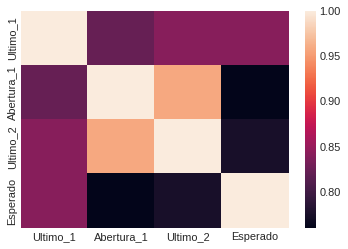

In [ ]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [ ]:
x = data[["Ultimo_1", "Abertura_1", "Ultimo_2"]]
y = data["Esperado"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

Definimos 20% dos dados para teste

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)


Previsão realizada a partir dos dados

In [ ]:
data = pd.DataFrame(data={"Previsão": ypred.flatten()})
print(data)

     Previsão
0    0.999800
1    1.012100
2    1.005500
3    1.000600
4    0.999933
..        ...
214  1.000275
215  0.999933
216  1.000400
217  1.000700
218  1.004000

[219 rows x 1 columns]


In [ ]:
erro = y - ypred
erro = pd.DataFrame(data={"Erro": erro.flatten()})
print(erro[0:219])

         Erro
0    0.001600
1   -0.010700
2   -0.004100
3    0.000800
4    0.001467
..        ...
214  0.001125
215  0.001467
216  0.001000
217  0.000700
218 -0.002600

[219 rows x 1 columns]


In [ ]:
mse_dt = MSE(ytest, ypred)
rmse_dt = mse_dt**(1/2)
print("RMSE: ", rmse_dt)

RMSE:  0.001324567904569384


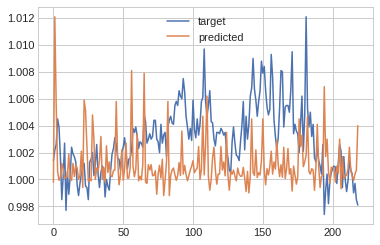

In [ ]:
from pylab import plot, show, legend, title, xlabel, ylabel, axis
Target = y[0:219]
Predicted = ypred
plt.plot(Target, label= "target")
plt.plot(Predicted, label= "predicted")
plt.legend()
plt.show()

